<a href="https://colab.research.google.com/github/satvikGarre/Market-Segmentation/blob/main/EV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
ev_data = pd.read_csv('EV_cars_India_2023(2).csv')

In [ ]:
ev_data.head()
ev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Car_name      30 non-null     object 
 1   Car_price     30 non-null     object 
 2   Batter_cap    30 non-null     object 
 3   Drive_range   30 non-null     object 
 4   Power         30 non-null     object 
 5   Charge_time   30 non-null     float64
 6   transmission  30 non-null     object 
dtypes: float64(1), object(6)
memory usage: 1.8+ KB


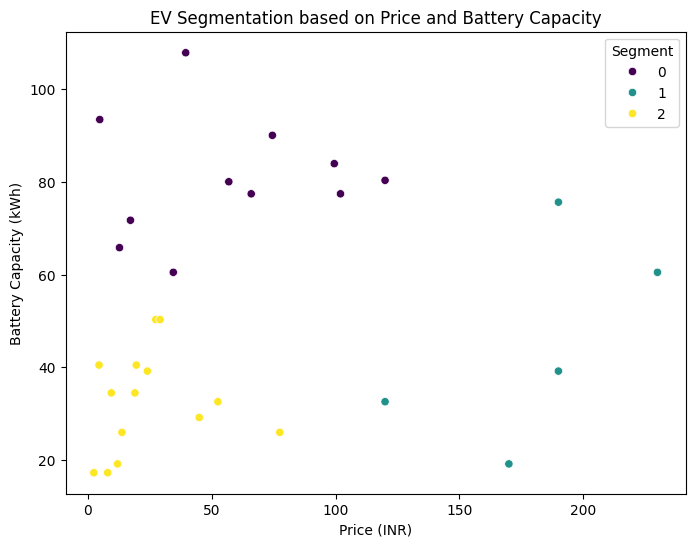

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

ev_data = pd.read_csv('EV_cars_India_2023(2).csv')


ev_data['Car_price'] = ev_data['Car_price'].str.extract('(\d+\.?\d*)').astype(float)

ev_data['Batter_cap'] = ev_data['Batter_cap'].str.extract('(\d+\.?\d*)').astype(float)

kmeans = KMeans(n_clusters=3, random_state=42)

X = ev_data[['Car_price', 'Batter_cap']].copy()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

ev_data['Segment'] = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Car_price', y='Batter_cap', hue='Segment', data=ev_data, palette='viridis')
plt.title('EV Segmentation based on Price and Battery Capacity')
plt.xlabel('Price (INR)')
plt.ylabel('Battery Capacity (kWh)')
plt.show()

<ipython-input-8-008a02c535d7>:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ev_data['Price_per_kWh'].fillna(0, inplace=True) # Handle potential division by zero


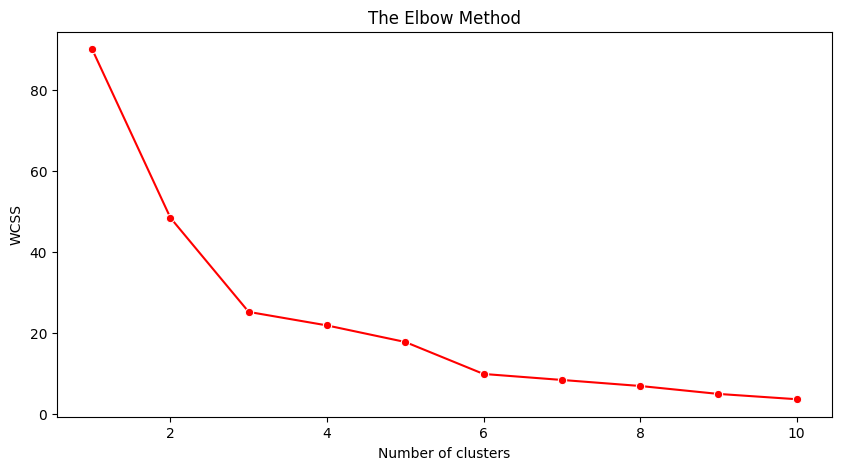

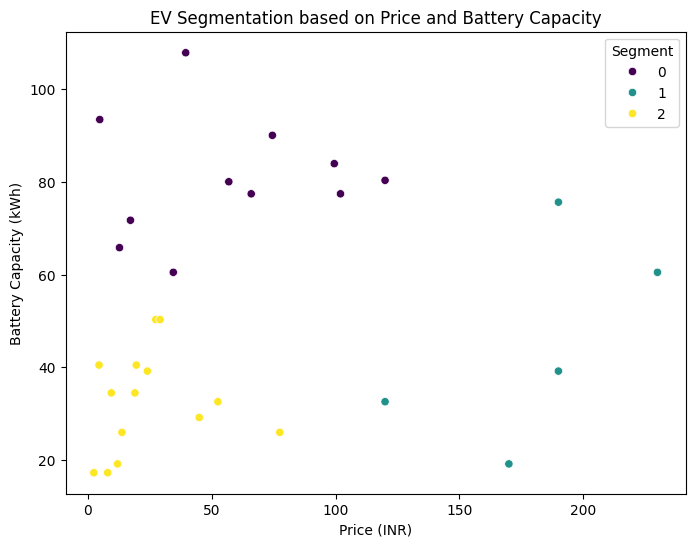

Car_price                     Batter_cap                    \
               mean   median        std       mean median        std   
Segment                                                                
0         57.052727   56.900  39.073559  80.743636  80.00  13.140386   
1        180.000000  190.000  40.000000  45.416000  39.20  22.517577   
2         24.581429   19.265  21.041917  32.671429  33.55  10.914100   

        Price_per_kWh                      
                 mean    median       std  
Segment                                    
0            0.710082  0.711250  0.480027  
1            4.739645  3.802910  2.444176  
2            0.788528  0.547583  0.768446

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

ev_data = pd.read_csv('EV_cars_India_2023(2).csv')

ev_data.fillna(0, inplace=True)


ev_data['Car_price'] = ev_data['Car_price'].str.extract('(\d+\.?\d*)').astype(float)

ev_data['Batter_cap'] = ev_data['Batter_cap'].str.extract('(\d+\.?\d*)').astype(float)

ev_data['Price_per_kWh'] = ev_data['Car_price'] / ev_data['Batter_cap']
ev_data['Price_per_kWh'].fillna(0, inplace=True)


features_for_clustering = ['Car_price', 'Batter_cap', 'Price_per_kWh']
X = ev_data[features_for_clustering].copy()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

elbow_data = pd.DataFrame({'Number of Clusters': range(1, 11), 'WCSS': wcss})

plt.figure(figsize=(10,5))
sns.lineplot(x='Number of Clusters', y='WCSS', data=elbow_data, marker='o', color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()



optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
ev_data['Segment'] = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Car_price', y='Batter_cap', hue='Segment', data=ev_data, palette='viridis')
plt.title('EV Segmentation based on Price and Battery Capacity')
plt.xlabel('Price (INR)')
plt.ylabel('Battery Capacity (kWh)')
plt.show()


segment_stats = ev_data.groupby('Segment').agg({
    'Car_price': ['mean', 'median', 'std'],
    'Batter_cap': ['mean', 'median', 'std'],
    'Price_per_kWh': ['mean', 'median', 'std']
})
segment_stats

First few rows of the dataset:
        Car_name    Car_price Batter_cap          Drive_range       Power  \
0    MG Comet EV   7.98  lakh   17.3 kWh  230  km/full charge   41.42 Bhp   
1  Tata Tiago EV  11.99  lakh   19.2 KWh   250 km/full charge   73.75 Bhp   
2  Tata Tigor EV  13.75  lakh     26 kWh   315 km/full charge   73.75 Bhp   
3       MG ZS EV  27.40  lakh   50.3 kWh   461 km/full charge  174.33 Bhp   
4     BYD Atto 3  34.49  lakh  60.48 kWh   521 km/full charge  201.15 Bhp   

   Charge_time transmission  
0          7.0    Automatic  
1          1.0    Automatic  
2          7.5    Automatic  
3          9.0    Automatic  
4          9.5    Automatic  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Car_name      30 non-null     object 
 1   Car_price     30 non-null     object 
 2   Batter_cap    30 non-null     ob

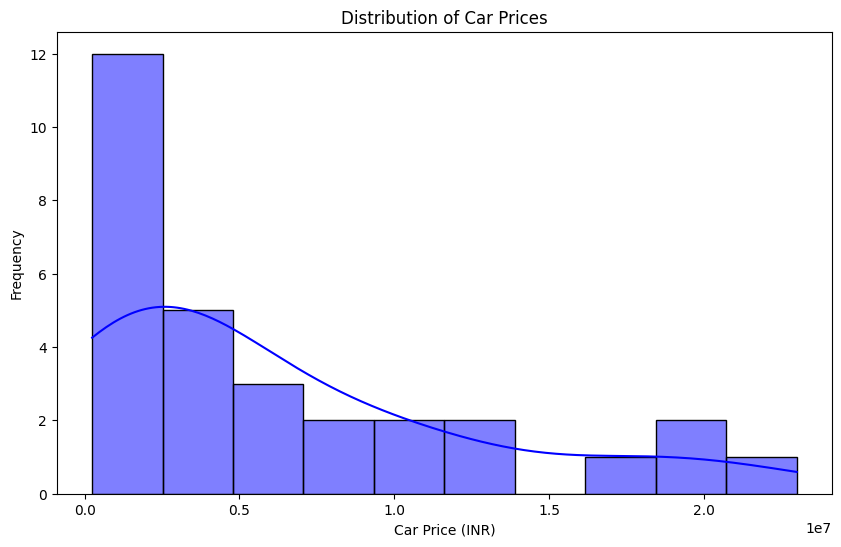

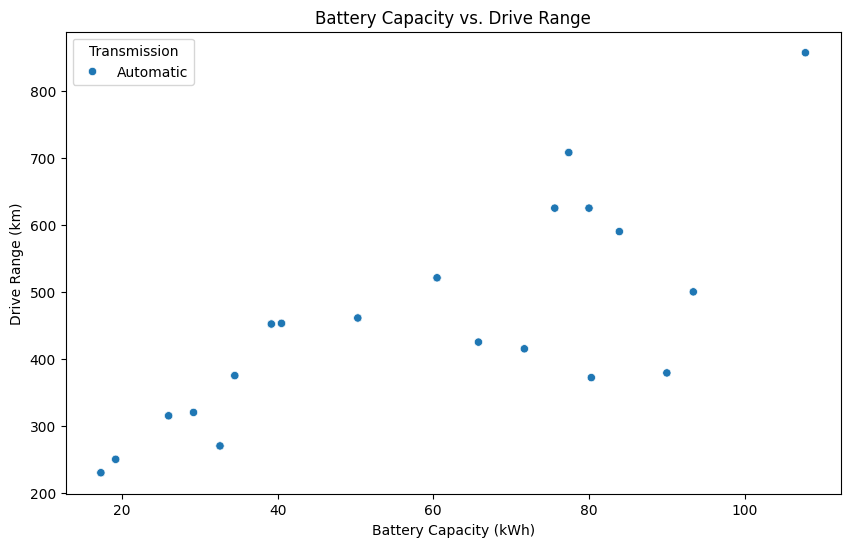

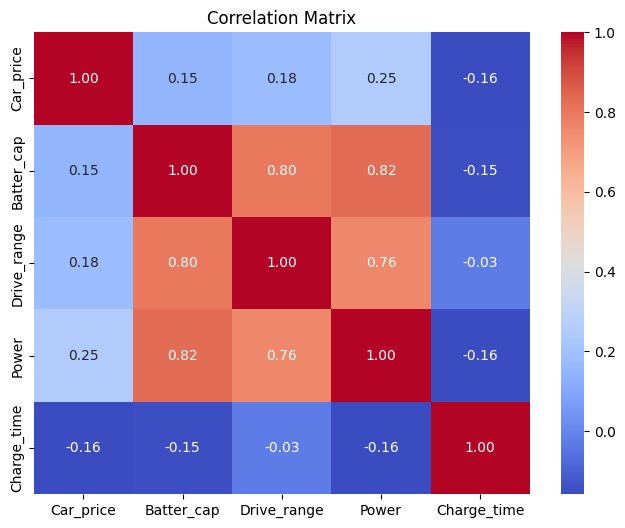


Cleaned dataset saved as 'cleaned_ev_cars.csv'.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('EV_cars_India_2023(2).csv')

print("First few rows of the dataset:")
print(data.head())

print("\nDataset Info:")
print(data.info())

print("\nSummary Statistics:")
print(data.describe())

cleaned_data = data.copy()

def clean_price(price):
    price = str(price).replace("lakhs", "lakh").replace("  ", " ").strip()
    try:
        numeric_value = float(price.replace("lakh", "").strip())
        return numeric_value * 100000
    except ValueError:
        return np.nan

cleaned_data['Car_price'] = cleaned_data['Car_price'].apply(clean_price)
cleaned_data['Batter_cap'] = cleaned_data['Batter_cap'].str.replace(r'[^0-9.]', '', regex=True).astype(float)
cleaned_data['Drive_range'] = cleaned_data['Drive_range'].str.replace(r'[^0-9.]', '', regex=True)
cleaned_data['Drive_range'] = pd.to_numeric(cleaned_data['Drive_range'], errors='coerce')
cleaned_data['Drive_range'] = cleaned_data['Drive_range'].astype(float)
cleaned_data['Power'] = cleaned_data['Power'].str.replace('Bhp', '').astype(float)

print("\nCleaned Dataset Info:")
print(cleaned_data.info())
print("\nFirst few rows of the cleaned dataset:")
print(cleaned_data.head())

print("\nMissing Values:")
print(cleaned_data.isnull().sum())


plt.figure(figsize=(10, 6))
sns.histplot(cleaned_data['Car_price'], bins=10, kde=True, color='blue')
plt.title('Distribution of Car Prices')
plt.xlabel('Car Price (INR)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=cleaned_data, x='Batter_cap', y='Drive_range', hue='transmission')
plt.title('Battery Capacity vs. Drive Range')
plt.xlabel('Battery Capacity (kWh)')
plt.ylabel('Drive Range (km)')
plt.legend(title='Transmission')
plt.show()

plt.figure(figsize=(8, 6))
numeric_data = cleaned_data.select_dtypes(include=np.number)  d
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

cleaned_data.to_csv('cleaned_ev_cars.csv', index=False)
print("\nCleaned dataset saved as 'cleaned_ev_cars.csv'.")


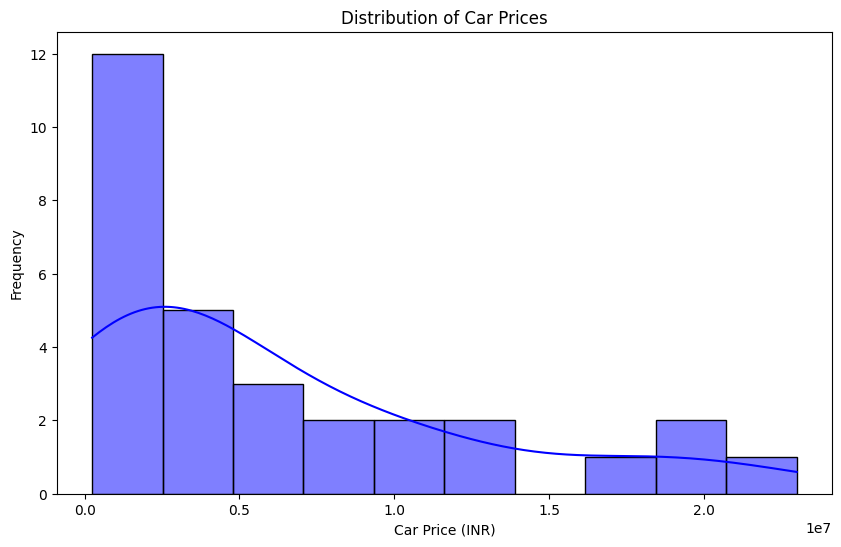

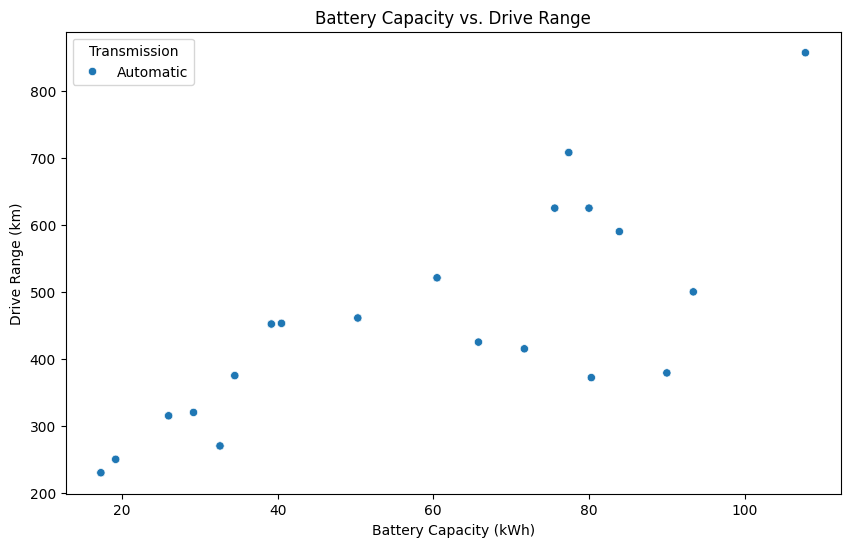

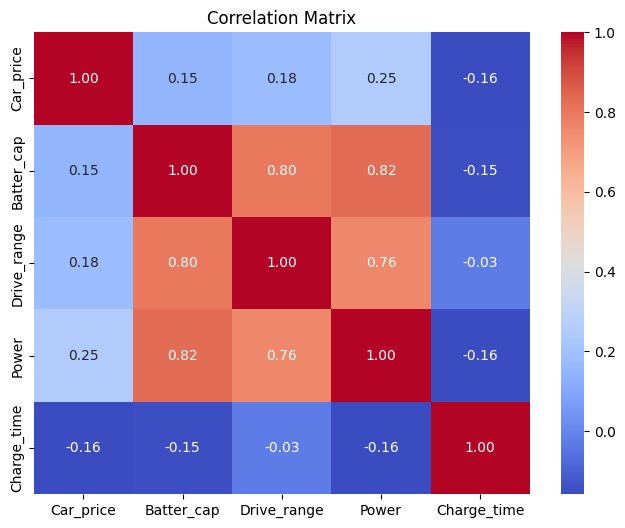

In [ ]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


plt.figure(figsize=(10, 6))
sns.histplot(cleaned_data['Car_price'], bins=10, kde=True, color='blue')
plt.title('Distribution of Car Prices')
plt.xlabel('Car Price (INR)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=cleaned_data, x='Batter_cap', y='Drive_range', hue='transmission')
plt.title('Battery Capacity vs. Drive Range')
plt.xlabel('Battery Capacity (kWh)')
plt.ylabel('Drive Range (km)')
plt.legend(title='Transmission')
plt.show()

plt.figure(figsize=(8, 6))
numeric_data = cleaned_data.select_dtypes(include=np.number)
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
dataset = pd.read_csv('EV_cars_India_2023(2).csv')
dataset['Car_price_num'] = dataset['Car_price'].str.extract(r'([\d.]+)').astype(float)
dataset['Batter_cap_num'] = dataset['Batter_cap'].str.extract(r'([\d.]+)').astype(float)
dataset['Drive_range_num'] = dataset['Drive_range'].str.extract(r'([\d.]+)').astype(float)
dataset['Power_num'] = dataset['Power'].str.extract(r'([\d.]+)').astype(float)
dataset['Price_segment'] = pd.cut(dataset['Car_price_num'],
                                  bins=[0, 10, 25, float('inf')],
                                  labels=['Budget', 'Mid-range', 'Premium'])
dataset['Battery_segment'] = pd.cut(dataset['Batter_cap_num'],
                                    bins=[0, 20, 50, float('inf')],
                                    labels=['Low capacity', 'Medium capacity', 'High capacity'])
dataset['Range_segment'] = pd.cut(dataset['Drive_range_num'],
                                  bins=[0, 300, 500, float('inf')],
                                  labels=['Short range', 'Medium range', 'Long range'])
dataset['Power_segment'] = pd.cut(dataset['Power_num'],
                                  bins=[0, 100, 200, float('inf')],
                                  labels=['Low power', 'Medium power', 'High power'])
segmented_data = dataset[['Car_name', 'Price_segment', 'Battery_segment', 'Range_segment', 'Power_segment']]
segmented_data.head()


,Car_name,Price_segment,Battery_segment,Range_segment,Power_segment
0,MG Comet EV,Budget,Low capacity,Short range,Low power
1,Tata Tiago EV,Mid-range,Low capacity,Short range,Low power
2,Tata Tigor EV,Mid-range,Medium capacity,Medium range,Low power
3,MG ZS EV,Premium,High capacity,Medium range,Medium power
4,BYD Atto 3,Premium,High capacity,Long range,High power


In [ ]:
desc_stats = dataset[['Car_price_num', 'Batter_cap_num', 'Drive_range_num', 'Power_num', 'Charge_time']].describe()
print(desc_stats)
correlation_matrix = dataset[['Car_price_num', 'Batter_cap_num', 'Drive_range_num', 'Power_num', 'Charge_time']].corr()
print(correlation_matrix)




       Car_price_num  Batter_cap_num  Drive_range_num   Power_num  Charge_time
count      30.000000       30.000000        30.000000   30.000000    30.000000
mean       62.390667       52.422000       439.266667  213.954333     5.658667
std        63.493167       26.151593       156.270749  174.374592     3.895910
min         2.400000       17.300000       230.000000   41.420000     0.500000
25%        14.610000       32.600000       316.250000   73.750000     2.500000
50%        36.995000       45.400000       438.500000  174.330000     5.800000
75%        94.000000       76.950000       515.750000  320.550000     7.500000
max       230.000000      107.800000       857.000000  750.970000    15.000000
                 Car_price_num  Batter_cap_num  Drive_range_num  Power_num  \
Car_price_num         1.000000        0.154320         0.177860   0.252312   
Batter_cap_num        0.154320        1.000000         0.798265   0.824745   
Drive_range_num       0.177860        0.798265         

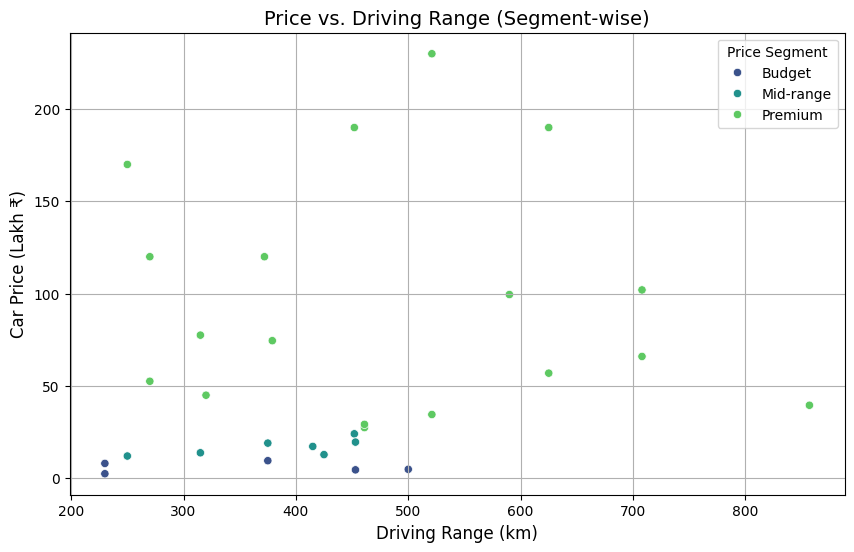

<ipython-input-13-bb11e6dbd6df>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataset, x='Battery_segment', y='Batter_cap_num', palette='pastel')


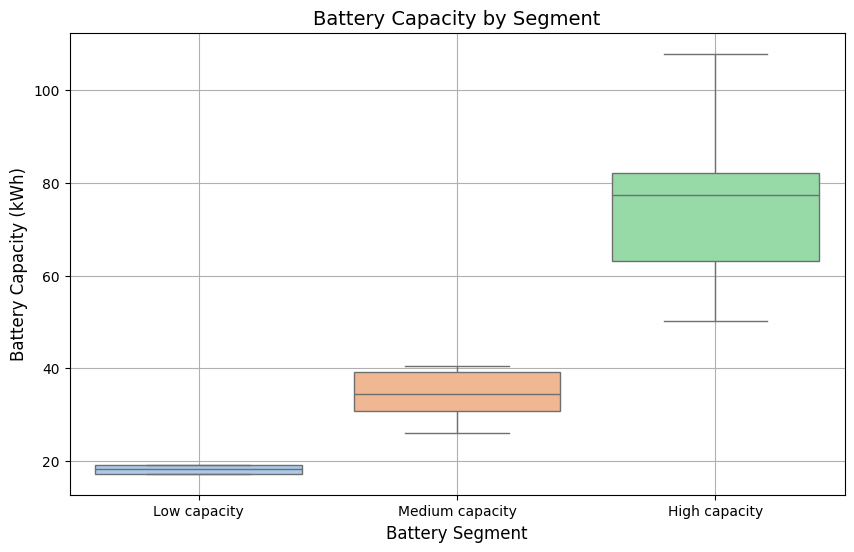

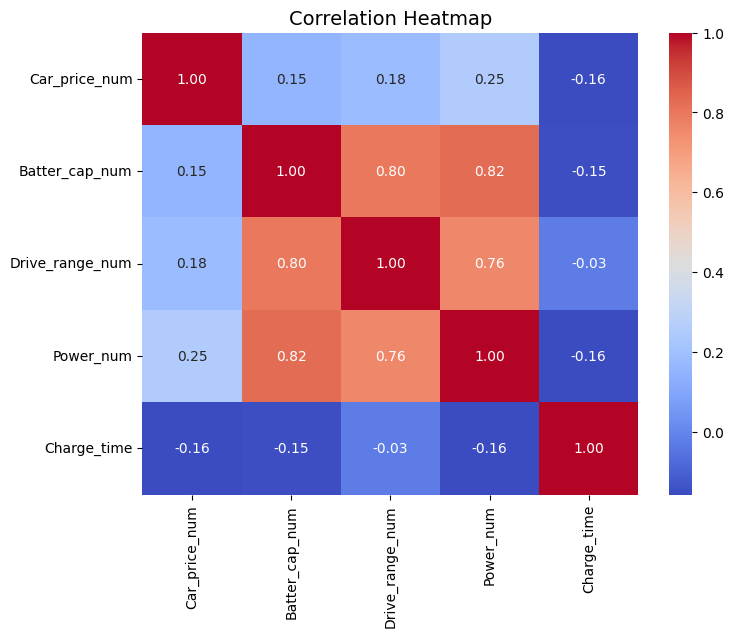

(       Car_price_num  Batter_cap_num  Drive_range_num   Power_num  Charge_time
 count      30.000000       30.000000        30.000000   30.000000    30.000000
 mean       62.390667       52.422000       439.266667  213.954333     5.658667
 std        63.493167       26.151593       156.270749  174.374592     3.895910
 min         2.400000       17.300000       230.000000   41.420000     0.500000
 25%        14.610000       32.600000       316.250000   73.750000     2.500000
 50%        36.995000       45.400000       438.500000  174.330000     5.800000
 75%        94.000000       76.950000       515.750000  320.550000     7.500000
 max       230.000000      107.800000       857.000000  750.970000    15.000000,
                  Car_price_num  Batter_cap_num  Drive_range_num  Power_num  \
 Car_price_num         1.000000        0.154320         0.177860   0.252312   
 Batter_cap_num        0.154320        1.000000         0.798265   0.824745   
 Drive_range_num       0.177860        0.7

In [ ]:


dataset['Car_price_num'] = dataset['Car_price'].str.extract(r'([\d.]+)').astype(float)
dataset['Batter_cap_num'] = dataset['Batter_cap'].str.extract(r'([\d.]+)').astype(float)
dataset['Drive_range_num'] = dataset['Drive_range'].str.extract(r'([\d.]+)').astype(float)
dataset['Power_num'] = dataset['Power'].str.extract(r'([\d.]+)').astype(float)

dataset['Price_segment'] = pd.cut(dataset['Car_price_num'], bins=[0, 10, 25, float('inf')], labels=['Budget', 'Mid-range', 'Premium'])
dataset['Battery_segment'] = pd.cut(dataset['Batter_cap_num'], bins=[0, 20, 50, float('inf')], labels=['Low capacity', 'Medium capacity', 'High capacity'])
dataset['Range_segment'] = pd.cut(dataset['Drive_range_num'], bins=[0, 300, 500, float('inf')], labels=['Short range', 'Medium range', 'Long range'])
dataset['Power_segment'] = pd.cut(dataset['Power_num'], bins=[0, 100, 200, float('inf')], labels=['Low power', 'Medium power', 'High power'])

desc_stats = dataset[['Car_price_num', 'Batter_cap_num', 'Drive_range_num', 'Power_num', 'Charge_time']].describe()

correlation_matrix = dataset[['Car_price_num', 'Batter_cap_num', 'Drive_range_num', 'Power_num', 'Charge_time']].corr()



plt.figure(figsize=(10, 6))
sns.scatterplot(data=dataset, x='Drive_range_num', y='Car_price_num', hue='Price_segment', palette='viridis')
plt.title('Price vs. Driving Range (Segment-wise)', fontsize=14)
plt.xlabel('Driving Range (km)', fontsize=12)
plt.ylabel('Car Price (Lakh ₹)', fontsize=12)
plt.legend(title='Price Segment')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=dataset, x='Battery_segment', y='Batter_cap_num', palette='pastel')
plt.title('Battery Capacity by Segment', fontsize=14)
plt.xlabel('Battery Segment', fontsize=12)
plt.ylabel('Battery Capacity (kWh)', fontsize=12)
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap', fontsize=14)
plt.show()

desc_stats, correlation_matrix


In [ ]:
desc_stats = dataset[['Car_price_num', 'Batter_cap_num', 'Drive_range_num', 'Power_num', 'Charge_time']].describe()
print(desc_stats)

       Car_price_num  Batter_cap_num  Drive_range_num   Power_num  Charge_time
count      30.000000       30.000000        30.000000   30.000000    30.000000
mean       62.390667       52.422000       439.266667  213.954333     5.658667
std        63.493167       26.151593       156.270749  174.374592     3.895910
min         2.400000       17.300000       230.000000   41.420000     0.500000
25%        14.610000       32.600000       316.250000   73.750000     2.500000
50%        36.995000       45.400000       438.500000  174.330000     5.800000
75%        94.000000       76.950000       515.750000  320.550000     7.500000
max       230.000000      107.800000       857.000000  750.970000    15.000000


In [ ]:
correlation_matrix = dataset[['Car_price_num', 'Batter_cap_num', 'Drive_range_num', 'Power_num', 'Charge_time']].corr()
print(correlation_matrix)

                 Car_price_num  Batter_cap_num  Drive_range_num  Power_num  \
Car_price_num         1.000000        0.154320         0.177860   0.252312   
Batter_cap_num        0.154320        1.000000         0.798265   0.824745   
Drive_range_num       0.177860        0.798265         1.000000   0.756095   
Power_num             0.252312        0.824745         0.756095   1.000000   
Charge_time          -0.157605       -0.151176        -0.027138  -0.157621   

                 Charge_time  
Car_price_num      -0.157605  
Batter_cap_num     -0.151176  
Drive_range_num    -0.027138  
Power_num          -0.157621  
Charge_time         1.000000  


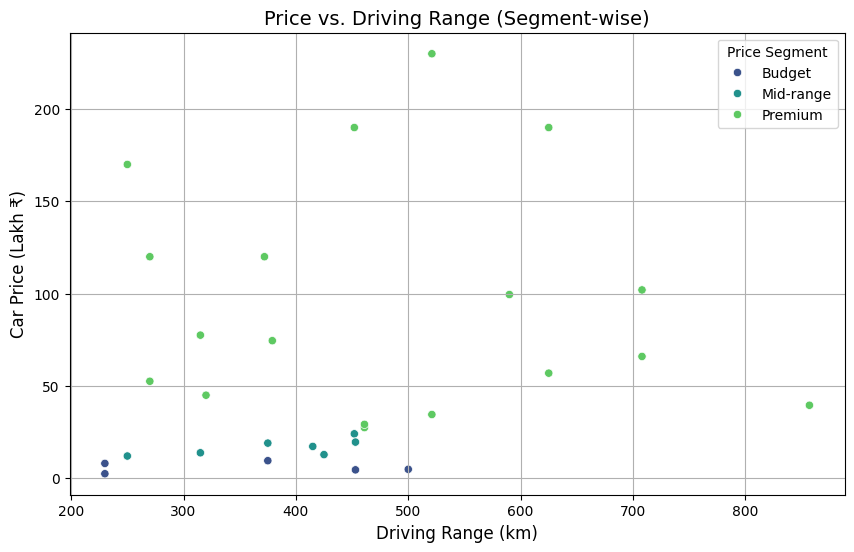

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dataset, x='Drive_range_num', y='Car_price_num', hue='Price_segment', palette='viridis')
plt.title('Price vs. Driving Range (Segment-wise)', fontsize=14)
plt.xlabel('Driving Range (km)', fontsize=12)
plt.ylabel('Car Price (Lakh ₹)', fontsize=12)
plt.legend(title='Price Segment')
plt.grid(True)
plt.show()

<ipython-input-17-031191c4c5f9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataset, x='Battery_segment', y='Batter_cap_num', palette='pastel')


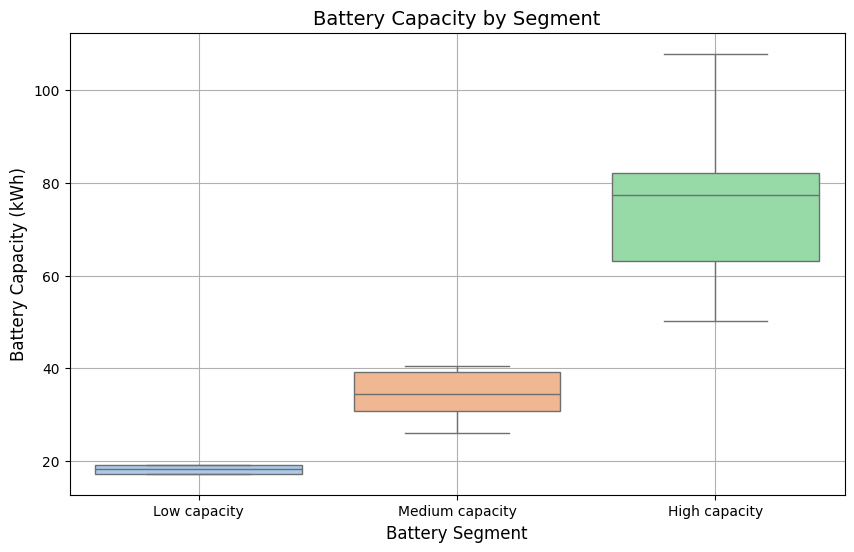

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=dataset, x='Battery_segment', y='Batter_cap_num', palette='pastel')
plt.title('Battery Capacity by Segment', fontsize=14)
plt.xlabel('Battery Segment', fontsize=12)
plt.ylabel('Battery Capacity (kWh)', fontsize=12)
plt.grid(True)
plt.show()

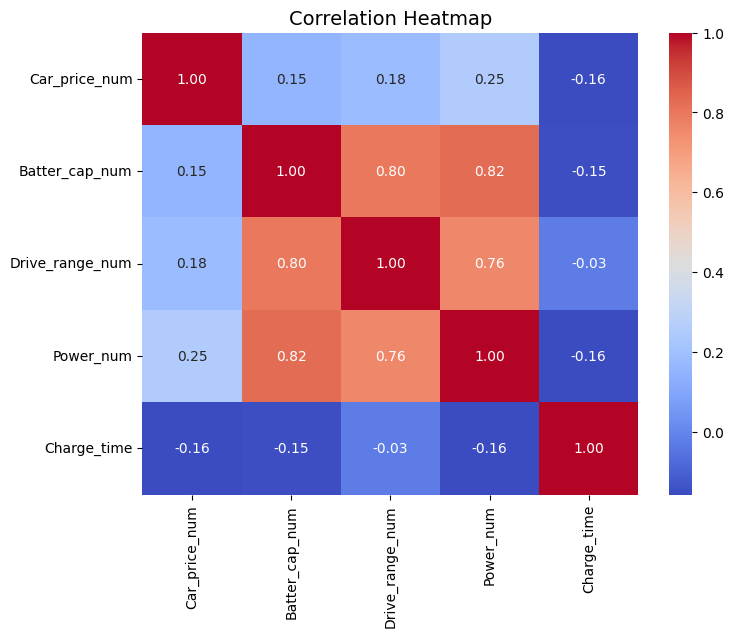

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap', fontsize=14)
plt.show()